In [2]:
# 공공데이터포털(www.data.go.kr/)

# 관심 있는 데이터 찾아보기
##엑셀 자신이 흥미가 있는 데이터를 보면서 데이터가 어떤 내용을 담고 있는지 살펴보기

# 명확한 문제 정의하기

# 알고리즘 설계하기(ex.전국에서 신도림동의 연령별 인구구조와 형태가 비슷한 지역)
##데이터 읽어오기
##궁금한 지역의 이름 입력받기
##궁금한 지역의 인구구조 저장
##궁금한 지역의 인구구조와 가장 비슷한 인구구조 가진 지역 찾기
##가장 비슷한 곳의 인구 구조와 궁금한 지역의 인구 구조 시각화

# 알고리즘 코드로 표현
##데이터 읽어오기
# import csv
# f = open(‘age.csv’)
# data = csv.reader(f)
# for row in data :
#     print(row)
##데이터 헤더 제외
#import csv
# f = open(‘age.csv’)
# data = csv.reader(f)
# next(data)
# for row in data :
#     print(row)
##궁금한 데이터 저장
##plot 등 시각화

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 도담동


<ipython-input-82-148a45011a87>:29: RuntimeWarning: invalid value encountered in true_divide
  away = np.array(row[4:], dtype=int)/int(row[2])


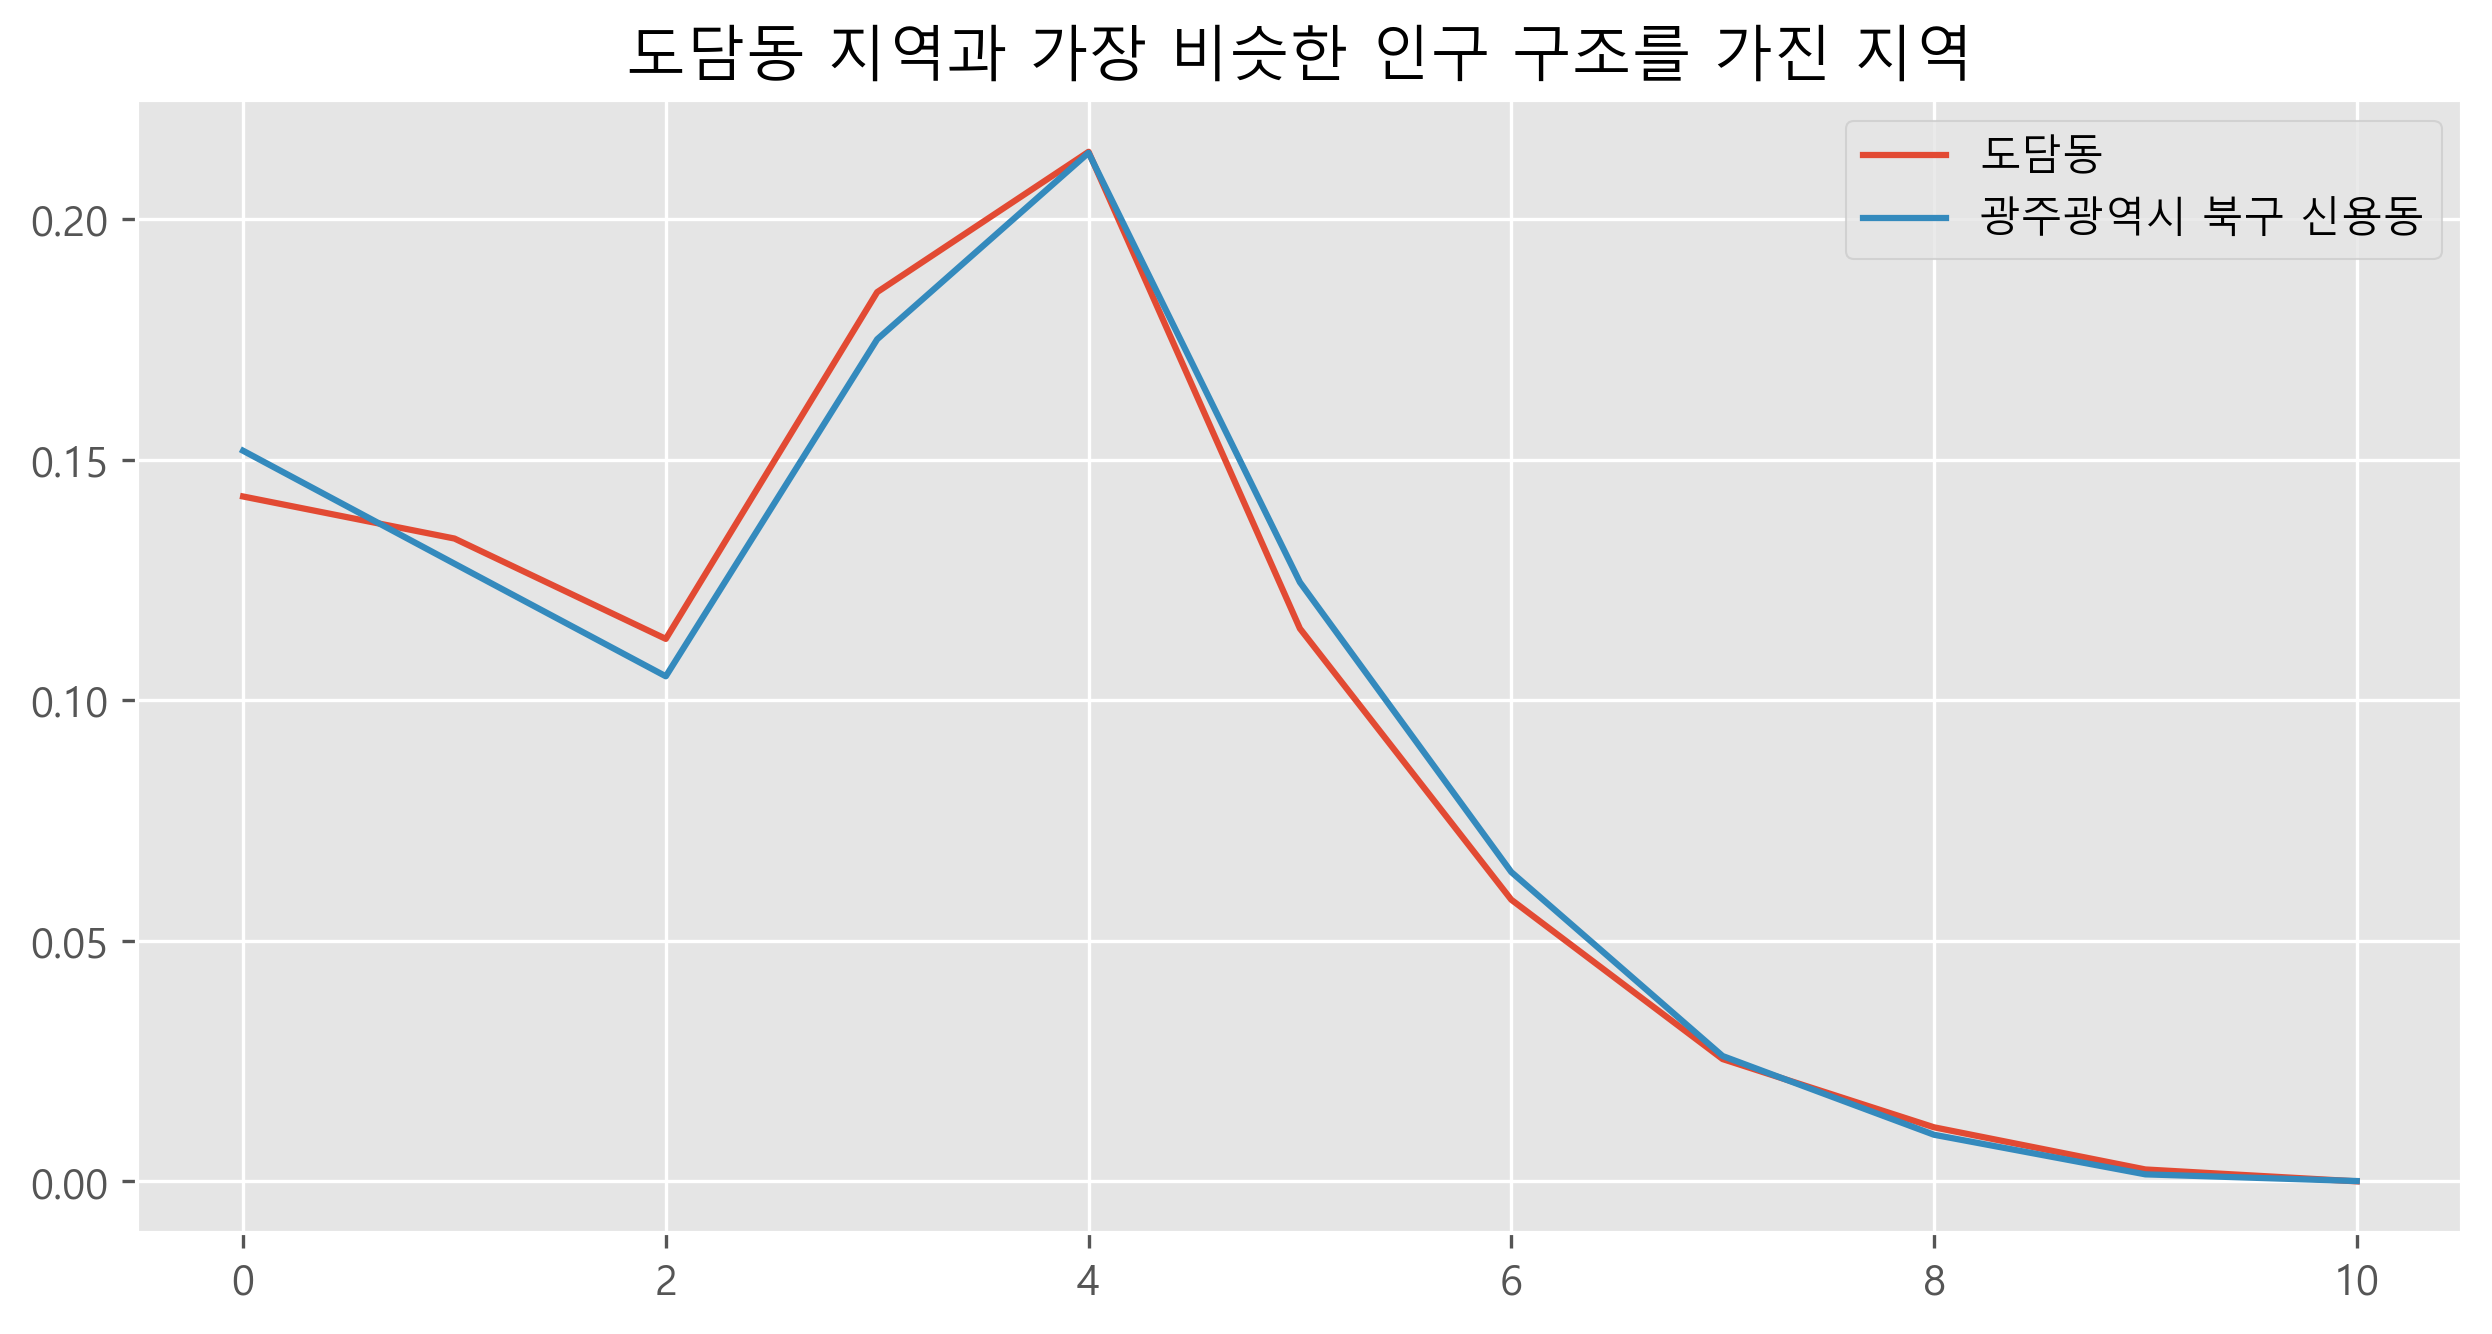

In [82]:
import numpy as np
import csv


# ➊ 데이터를 읽어온다.
f = open('age.csv')
data = csv.reader(f)
next(data)
data = list(data)



# ➋ 궁금한 지역의 이름을 입력받는다.
name = input('인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ')
mn = 1
result_name = ''
result = 0


for row in data :
    if name in row[1] :
        home = np.array(row[4:], dtype=int)/int(row[2])
        
for row in data :
    for i in row:
        i.replace(",","")
    try:
        #비율 구하기 위해 전체인구수로 연령대별 인구수 나누기
        away = np.array(row[4:], dtype=int)/int(row[2])
        #home의 인구비율에서 다른지역 인구비율 빼기
        s = np.sum((home-away)**2)
        if s < mn and name not in row[1] :
            mn = s
            result_name = row[1]
            result = away

    except:
        result_name = row[1]
        result = away    

        
# ➎ 궁금한 지역의 인구 구조와 가장 비슷한 곳의 인구 구조를 시각화한다.
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10,5), dpi=300)
plt.rc('font', family='Malgun Gothic')
plt.title(name+' 지역과 가장 비슷한 인구 구조를 가진 지역')
plt.plot(home, label=name)
plt.plot(result, label=result_name)
plt.legend()
plt.show()  